In [1]:
import os
import re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
def change_dtype_ser(ser):
    
    if ser.dtype == int:
        return ser.astype(np.int32)
    
    if ser.dtype == float:
        return ser.astype(np.float32)
    
    if ser.dtype == np.object:
        return ser.astype("category")
    
    return ser
    

def change_dtype_df(df):
    """
    change types of columns to reduce memory size
    :param df: dataframe
    :return df: dataframe
    """
    df["fecha_dato"] = pd.to_datetime(df["fecha_dato"])
    df["fecha_alta"] = pd.to_datetime(df["fecha_alta"])
    
    memory = df.memory_usage().sum() / 10**6
    print("Memory usage before changing types %0.2f MB" % memory)

    for col in df.columns:
        df[col] = change_dtype_ser(df[col])

    memory = df.memory_usage().sum() / 10 ** 6
    print("Memory usage after changing types %0.2f MB" % memory)
    return df


def load_csv(filename):
    df = pd.read_csv(filename)
    df = change_dtype_df(df)
    return df

In [3]:
INP_DIR = "data/data_/"

In [4]:
df_train = load_csv(os.path.join(INP_DIR, "train_cleaned.csv"))

/home/hai/opt/anaconda3-2020.02/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Memory usage before changing types 6946.48 MB
Memory usage after changing types 3302.66 MB


In [5]:
df_train.shape

(13647309, 68)

In [6]:
df_train.isnull().sum().sum()

0

In [7]:
df_train.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'indrel_1mes',
       'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall',
       'cod_prov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1',
       'ind_ahor_fin_ult1_just_purchased', 'ind_aval_fin_ult1_just_purchased',
       'ind_cco_fin_ult1_just_purchased', 'ind_cder_fin_ult1_just_purchased',

In [8]:
PROD_COLS = [col for col in df_train.columns if re.match(r"^ind_.*_ult1$", col)]
print(len(PROD_COLS))
print(PROD_COLS)

24
['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']


In [9]:
NEW_PURCH_COLS = [col for col in df_train.columns if re.match(r"^ind_.*_ult1_just_purchased$", col)]
print(len(NEW_PURCH_COLS))
print(NEW_PURCH_COLS)

24
['ind_ahor_fin_ult1_just_purchased', 'ind_aval_fin_ult1_just_purchased', 'ind_cco_fin_ult1_just_purchased', 'ind_cder_fin_ult1_just_purchased', 'ind_cno_fin_ult1_just_purchased', 'ind_ctju_fin_ult1_just_purchased', 'ind_ctma_fin_ult1_just_purchased', 'ind_ctop_fin_ult1_just_purchased', 'ind_ctpp_fin_ult1_just_purchased', 'ind_deco_fin_ult1_just_purchased', 'ind_deme_fin_ult1_just_purchased', 'ind_dela_fin_ult1_just_purchased', 'ind_ecue_fin_ult1_just_purchased', 'ind_fond_fin_ult1_just_purchased', 'ind_hip_fin_ult1_just_purchased', 'ind_plan_fin_ult1_just_purchased', 'ind_pres_fin_ult1_just_purchased', 'ind_reca_fin_ult1_just_purchased', 'ind_tjcr_fin_ult1_just_purchased', 'ind_valo_fin_ult1_just_purchased', 'ind_viv_fin_ult1_just_purchased', 'ind_nomina_ult1_just_purchased', 'ind_nom_pens_ult1_just_purchased', 'ind_recibo_ult1_just_purchased']


In [10]:
PROD_ENG = {"ind_ahor_fin_ult1": "Saving Acc", 
            "ind_aval_fin_ult1": "Guarantees", 
            "ind_cco_fin_ult1":  "Current Acc", 
            "ind_cder_fin_ult1": "Derivada Acc", 
            "ind_cno_fin_ult1":  "Payroll Acc", 
            "ind_ctju_fin_ult1": "Junior Acc", 
            "ind_ctma_fin_ult1": "Más particular Acc", 
            "ind_ctop_fin_ult1": "particular Acc", 
            "ind_ctpp_fin_ult1": "particular Plus Acc", 
            "ind_deco_fin_ult1": "Short-term deposits", 
            "ind_deme_fin_ult1": "Medium-term deposits", 
            "ind_dela_fin_ult1": "Long-term deposits", 
            "ind_ecue_fin_ult1": "e-account", 
            "ind_fond_fin_ult1": "Funds", 
            "ind_hip_fin_ult1":  "Mortgage", 
            "ind_plan_fin_ult1": "Pensions", 
            "ind_pres_fin_ult1": "Loans", 
            "ind_reca_fin_ult1": "Taxes", 
            "ind_tjcr_fin_ult1": "Credit Card", 
            "ind_valo_fin_ult1": "Securities", 
            "ind_viv_fin_ult1":  "Home Acc", 
            "ind_nomina_ult1":   "Payroll", 
            "ind_nom_pens_ult1": "Pensions", 
            "ind_recibo_ult1":   "Direct Debit"}

# Product popularity

Text(0, 0.5, 'Product')

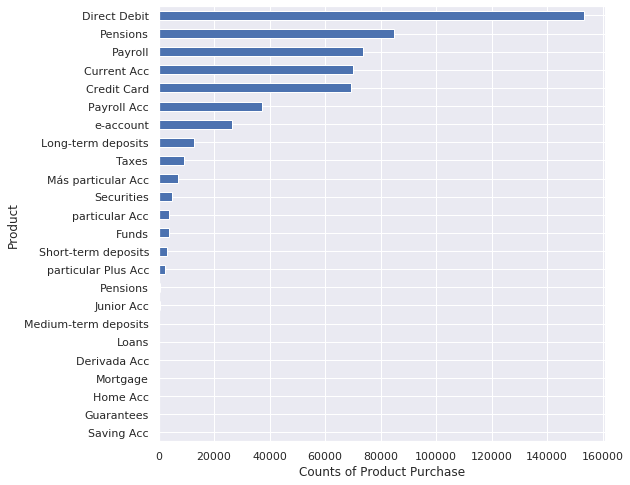

In [11]:
prod_popul = df_train[NEW_PURCH_COLS].sum(axis=0)
prod_names = [idx.replace("_just_purchased", "") for idx in prod_popul.index]
prod_names = [PROD_ENG[idx] for idx in prod_names]

prod_popul.index = prod_names
prod_popul = prod_popul.sort_values()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
prod_popul.plot(kind="barh", ax=ax)
ax.set_xlabel("Counts of Product Purchase")
ax.set_ylabel("Product")

In [12]:
# for later use
prod_popul = df_train[NEW_PURCH_COLS].sum(axis=0)
TEN_MOST_POP_PROD = prod_popul.sort_values(ascending=False).index[:10].to_list()
TEN_MOST_POP_PROD

['ind_recibo_ult1_just_purchased',
 'ind_nom_pens_ult1_just_purchased',
 'ind_nomina_ult1_just_purchased',
 'ind_cco_fin_ult1_just_purchased',
 'ind_tjcr_fin_ult1_just_purchased',
 'ind_cno_fin_ult1_just_purchased',
 'ind_ecue_fin_ult1_just_purchased',
 'ind_dela_fin_ult1_just_purchased',
 'ind_reca_fin_ult1_just_purchased',
 'ind_ctma_fin_ult1_just_purchased']

# Demographic, employment and customer features

How these features affects purchase probability of new products of the bank. 

The term `Purchase Probability` below means the probability for a randomly chosen customer at a randomly chosen month to buy (subscribe) a new product or to buy a particular product.

In [13]:
# purchase probability for any product
def pur_prob_any_prod(df, cols=NEW_PURCH_COLS):
    return df[cols].any(axis=1).sum(axis=0) / df.shape[0]


# purchase probability for each product
def pur_prob_by_prod(df, cols=NEW_PURCH_COLS):
    return df[cols].sum(axis=0) / df.shape[0]

## Sex

Text(0.5, 0, 'Sex')

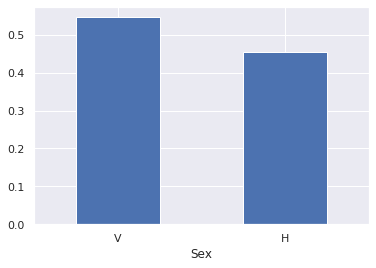

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

sexo_count = df_train["sexo"].value_counts(normalize=True)

sexo_count.plot(kind="bar", rot=0)
ax.set_xlabel("Sex")

Text(0, 0.5, 'Purchase Probability')

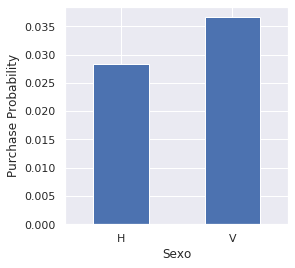

In [14]:
nr_pur_month = df_train[NEW_PURCH_COLS].groupby(df_train["sexo"]).apply(pur_prob_any_prod)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
nr_pur_month.plot(kind="bar", rot=0, ax=ax)
ax.set_xlabel("Sexo")
ax.set_ylabel("Purchase Probability")

In [15]:
nr_pur_prod_month = df_train[TEN_MOST_POP_PROD].groupby(df_train["sexo"]).apply(
    lambda df: pur_prob_by_prod(df, TEN_MOST_POP_PROD))

cols = [col.replace("_just_purchased", "") for col in nr_pur_prod_month.columns]
cols = [PROD_ENG[col] for col in cols]
nr_pur_prod_month.columns = cols
nr_pur_prod_month

,Direct Debit,Pensions,Payroll,Current Acc,Credit Card,Payroll Acc,e-account,Long-term deposits,Taxes,Más particular Acc
sexo,,,,,,,,,,
H,0.009530,0.005930,0.005185,0.004655,0.003930,0.002548,0.001615,0.000815,0.000519,0.000447
V,0.012636,0.006445,0.005593,0.005523,0.006034,0.002872,0.002197,0.001028,0.000808,0.000568


Text(0, 0.5, '10 Most Popular Products')

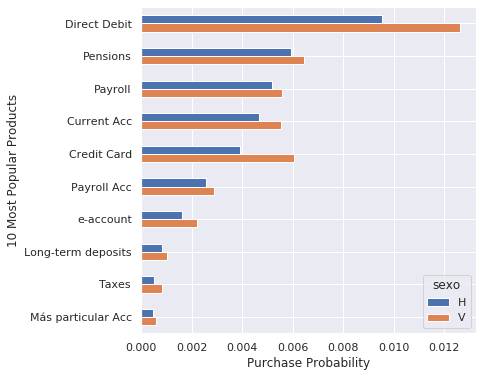

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

nr_pur_prod_month.T.plot(kind="barh", ax=ax)
ax.invert_yaxis()
ax.set_xlabel("Purchase Probability")
ax.set_ylabel("10 Most Popular Products")

## Age

Text(0.5, 0, 'Age')

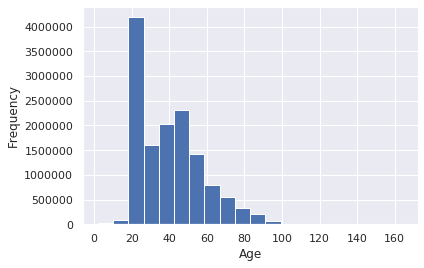

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
df_train["age"].plot(kind="hist", bins=20, ax=ax)
ax.set_xlabel("Age")

In [18]:
bin_edges = [-np.inf, 25, 40, 60, np.inf]
labels = ["<25", "25-40", "40-60", ">60"]
age_cut = pd.cut(df_train["age"], bins=bin_edges, labels=labels)

Text(0, 0.5, 'Purchase Probability')

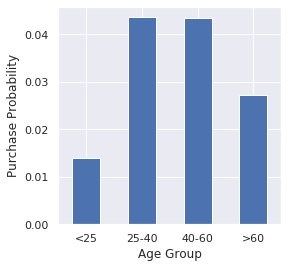

In [19]:
nr_pur_month = df_train[NEW_PURCH_COLS].groupby(age_cut).apply(pur_prob_any_prod)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
nr_pur_month.plot(kind="bar", rot=0, ax=ax)
ax.set_xlabel("Age Group")
ax.set_ylabel("Purchase Probability")

In [20]:
nr_pur_prod_month = df_train[TEN_MOST_POP_PROD].groupby(age_cut).apply(
    lambda df: pur_prob_by_prod(df, TEN_MOST_POP_PROD))

cols = [col.replace("_just_purchased", "") for col in nr_pur_prod_month.columns]
cols = [PROD_ENG[col] for col in cols]
nr_pur_prod_month.columns = cols
nr_pur_prod_month

,Direct Debit,Pensions,Payroll,Current Acc,Credit Card,Payroll Acc,e-account,Long-term deposits,Taxes,Más particular Acc
age,,,,,,,,,,
<25,0.005913,0.002442,0.002288,0.004094,0.000241,0.001507,0.000450,0.000038,0.000126,0.000070
25-40,0.016078,0.009635,0.009443,0.006999,0.004858,0.004711,0.002536,0.000621,0.001052,0.000770
40-60,0.014025,0.007152,0.006657,0.005344,0.009452,0.002859,0.002620,0.001538,0.000995,0.000668
>60,0.006627,0.005748,0.001463,0.003325,0.005009,0.001328,0.002345,0.001967,0.000375,0.000622


Text(0, 0.5, '10 Most Popular Products')

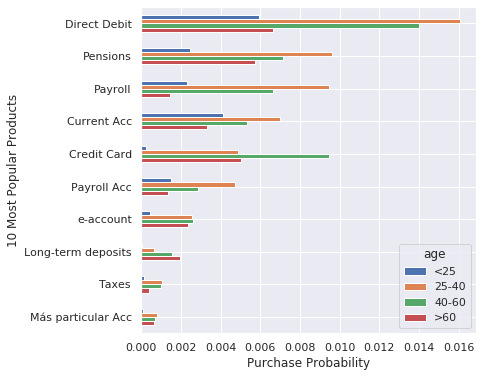

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

nr_pur_prod_month.T.plot(kind="barh", ax=ax)
ax.invert_yaxis()
ax.set_xlabel("Purchase Probability")
ax.set_ylabel("10 Most Popular Products")

## Income

Text(0.5, 0, 'Household Gross Income')

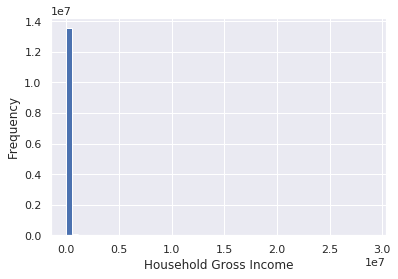

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
df_train["renta"].plot(kind="hist", bins=50, ax=ax)
ax.set_xlabel("Household Gross Income")

In [23]:
renta = df_train["renta"]

In [24]:
renta.quantile([0.25, 0.5, 0.75])

0.25     71274.687500
0.50     97829.101562
0.75    139070.968750
Name: renta, dtype: float64

In [25]:
bin_edges = [-np.inf, 50_000, 100_000, 200_000, np.inf]
labels = ["<50K", "50K-100K", "100K-200K", ">200K"]
income_cut = pd.cut(df_train["renta"], bins=bin_edges, labels=labels)
income_cut.name = "Income"

Text(0, 0.5, 'Purchase Probability')

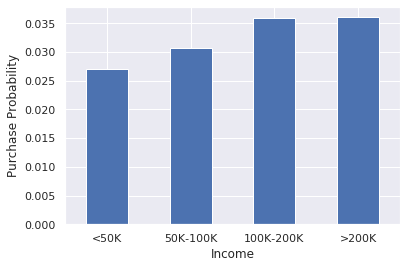

In [26]:
nr_pur_month = df_train[NEW_PURCH_COLS].groupby(income_cut).apply(pur_prob_any_prod)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
nr_pur_month.plot(kind="bar", rot=0, ax=ax)
ax.set_xlabel("Income")
ax.set_ylabel("Purchase Probability")

In [27]:
nr_pur_prod_month = df_train[TEN_MOST_POP_PROD].groupby(income_cut).apply(
    lambda df: pur_prob_by_prod(df, TEN_MOST_POP_PROD))

cols = [col.replace("_just_purchased", "") for col in nr_pur_prod_month.columns]
cols = [PROD_ENG[col] for col in cols]
nr_pur_prod_month.columns = cols
nr_pur_prod_month

,Direct Debit,Pensions,Payroll,Current Acc,Credit Card,Payroll Acc,e-account,Long-term deposits,Taxes,Más particular Acc
Income,,,,,,,,,,
<50K,0.010572,0.005803,0.005190,0.004235,0.002914,0.002897,0.001233,0.000480,0.000628,0.000199
50K-100K,0.010991,0.005712,0.005065,0.005361,0.003871,0.002740,0.001829,0.000757,0.000618,0.000557
100K-200K,0.011687,0.006704,0.005831,0.005277,0.006304,0.002751,0.002254,0.001152,0.000721,0.000612
>200K,0.011200,0.006919,0.005589,0.004448,0.007531,0.002466,0.001863,0.001251,0.000803,0.000277


Text(0, 0.5, '10 Most Popular Products')

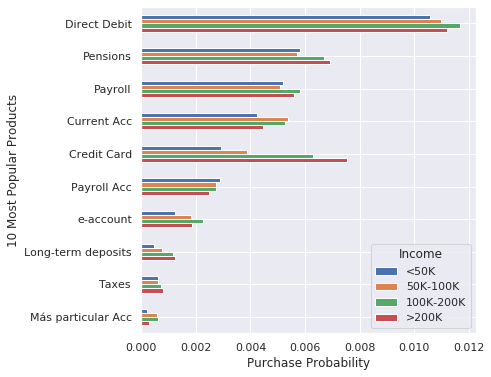

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

nr_pur_prod_month.T.plot(kind="barh", ax=ax)
ax.invert_yaxis()
ax.set_xlabel("Purchase Probability")
ax.set_ylabel("10 Most Popular Products")

## Customer Segment

In [29]:
df_train["segmento"].unique()

[01 - TOP, 02 - PARTICULARES, 03 - UNIVERSITARIO]
Categories (3, object): [01 - TOP, 02 - PARTICULARES, 03 - UNIVERSITARIO]

In [30]:
SEGMENT_ENG = {"01 - TOP": "VIP", "02 - PARTICULARES": "Individual", "03 - UNIVERSITARIO": "College Graduate"}

Text(0.5, 0, 'Customer Segment')

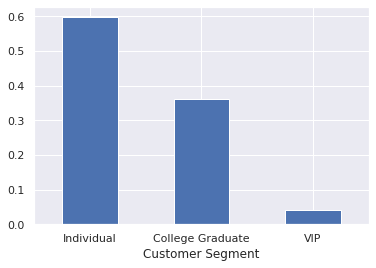

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

segmento_count = df_train["segmento"].value_counts(normalize=True)
segmento_count.index = [SEGMENT_ENG[i] for i in segmento_count.index]

segmento_count.plot(kind="bar", rot=0)
ax.set_xlabel("Customer Segment")

Text(0, 0.5, 'Purchase Probability')

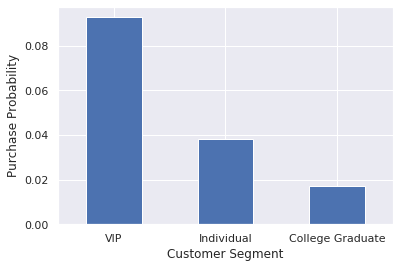

In [31]:
nr_pur_month = df_train[NEW_PURCH_COLS].groupby(df_train["segmento"]).apply(pur_prob_any_prod)
nr_pur_month.index = [SEGMENT_ENG[i] for i in nr_pur_month.index]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
nr_pur_month.plot(kind="bar", rot=0, ax=ax)
ax.set_xlabel("Customer Segment")
ax.set_ylabel("Purchase Probability")

In [32]:
nr_pur_prod_month = df_train[TEN_MOST_POP_PROD].groupby(df_train["segmento"]).apply(
    lambda df: pur_prob_by_prod(df, TEN_MOST_POP_PROD))

cols = [col.replace("_just_purchased", "") for col in nr_pur_prod_month.columns]
cols = [PROD_ENG[col] for col in cols]
nr_pur_prod_month.columns = cols
nr_pur_prod_month.index = [SEGMENT_ENG[i] for i in nr_pur_prod_month.index]
nr_pur_prod_month.index.name = "Customer Segment"
nr_pur_prod_month

,Direct Debit,Pensions,Payroll,Current Acc,Credit Card,Payroll Acc,e-account,Long-term deposits,Taxes,Más particular Acc
Customer Segment,,,,,,,,,,
VIP,0.019303,0.015959,0.011337,0.009809,0.022544,0.002928,0.011666,0.005691,0.001558,0.001814
Individual,0.013033,0.007023,0.006056,0.005625,0.006426,0.003181,0.002176,0.001127,0.000866,0.000690
College Graduate,0.007322,0.003761,0.003662,0.003778,0.000865,0.001949,0.000422,0.000066,0.000264,0.000073


Text(0, 0.5, '10 Most Popular Products')

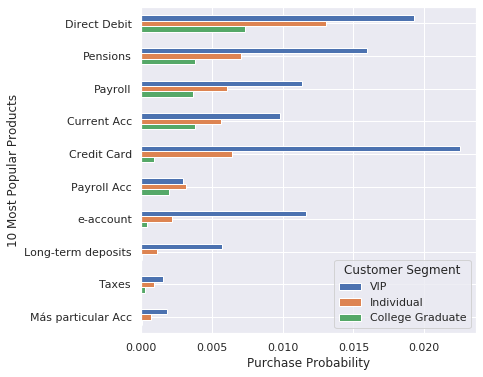

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

nr_pur_prod_month.T.plot(kind="barh", ax=ax)
ax.invert_yaxis()
ax.set_xlabel("Purchase Probability")
ax.set_ylabel("10 Most Popular Products")

## Employment status

In [39]:
df_train["ind_empleado"].unique()

[F, A, N, B, S]
Categories (5, object): [F, A, N, B, S]

Text(0.5, 0, 'Employment')

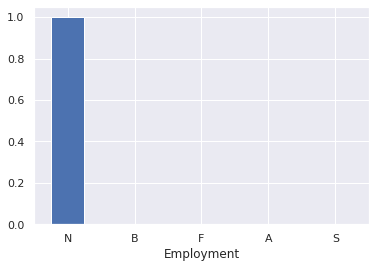

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

empleado_count = df_train["ind_empleado"].value_counts(normalize=True)

empleado_count.plot(kind="bar", rot=0)
ax.set_xlabel("Employment")

In [65]:
df_train["ind_empleado"].value_counts()

N    13638711
B        3566
F        2523
A        2492
S          17
Name: ind_empleado, dtype: int64

Text(0, 0.5, 'Purchase Probability')

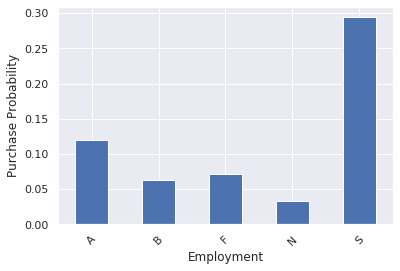

In [50]:
nr_pur_month = df_train[NEW_PURCH_COLS].groupby(df_train["ind_empleado"]).apply(pur_prob_any_prod)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
nr_pur_month.plot(kind="bar", rot=45, ax=ax)
ax.set_xlabel("Employment")
ax.set_ylabel("Purchase Probability")

In [51]:
nr_pur_prod_month = df_train[TEN_MOST_POP_PROD].groupby(df_train["ind_empleado"]).apply(
    lambda df: pur_prob_by_prod(df, TEN_MOST_POP_PROD))

cols = [col.replace("_just_purchased", "") for col in nr_pur_prod_month.columns]
cols = [PROD_ENG[col] for col in cols]
nr_pur_prod_month.columns = cols
nr_pur_prod_month

,Direct Debit,Pensions,Payroll,Current Acc,Credit Card,Payroll Acc,e-account,Long-term deposits,Taxes,Más particular Acc
ind_empleado,,,,,,,,,,
A,0.028090,0.009230,0.006822,0.020867,0.018860,0.020867,0.006421,0.004013,0.001204,0.000000
B,0.016826,0.008413,0.007011,0.006169,0.020191,0.005889,0.003085,0.002243,0.000561,0.000000
F,0.021799,0.005945,0.003964,0.012683,0.017836,0.003567,0.002378,0.001982,0.001585,0.000000
N,0.011219,0.006210,0.005407,0.005124,0.005070,0.002721,0.001932,0.000930,0.000677,0.000513
S,0.058824,0.000000,0.000000,0.000000,0.235294,0.000000,0.000000,0.058824,0.000000,0.000000


Text(0, 0.5, '10 Most Popular Products')

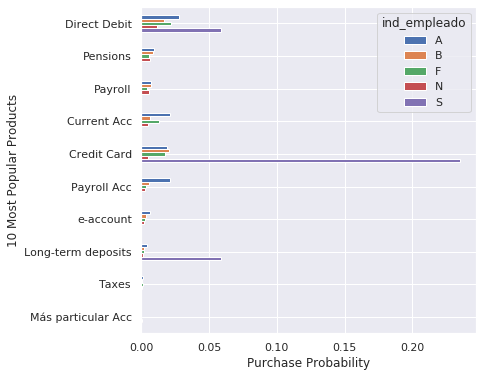

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

nr_pur_prod_month.T.plot(kind="barh", ax=ax)
ax.invert_yaxis()
ax.set_xlabel("Purchase Probability")
ax.set_ylabel("10 Most Popular Products")